# Technology stock market analysis

### I. First, import modules need:

In [1]:
import pandas as pd
import yfinance as yf
import seaborn as sns
import matplotlib.pyplot as plt

Các thư viện trên đã tương đối đấy đủ để visualize các dữ liệu. Để thân thiện hơn với người dùng và người dùng có thể tương tác với giao diện, tata sẽ sử dụng thêm các thư viện sau:

In [28]:
import plotly.express as px
import plotly.graph_objects as go
import plotly.subplots as sp
import webbrowser

### Next, thu thập dữ liệu cổ phiếu
Ta sẽ dùng thư viện yfinance để thu thập dữ liệu cổ phiếu:

In [3]:
symbol = "1810.HK"
df = yf.Ticker(symbol).history(period = "1y").reset_index()
df['Date'] = pd.to_datetime(df['Date'])
df

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2024-06-19 00:00:00+08:00,17.480000,18.500000,17.440001,18.480000,158776789,0.0,0.0
1,2024-06-20 00:00:00+08:00,18.500000,18.719999,18.299999,18.520000,90185310,0.0,0.0
2,2024-06-21 00:00:00+08:00,18.280001,18.400000,17.840000,18.180000,87851069,0.0,0.0
3,2024-06-24 00:00:00+08:00,17.959999,18.080000,17.559999,18.020000,69977040,0.0,0.0
4,2024-06-25 00:00:00+08:00,18.080000,18.139999,17.620001,17.780001,58116612,0.0,0.0
...,...,...,...,...,...,...,...,...
241,2025-06-13 00:00:00+08:00,51.900002,52.000000,50.799999,51.950001,176077650,0.0,0.0
242,2025-06-16 00:00:00+08:00,51.950001,54.500000,51.500000,54.150002,220357669,0.0,0.0
243,2025-06-17 00:00:00+08:00,54.200001,54.500000,53.599998,54.000000,71275572,0.0,0.0
244,2025-06-18 00:00:00+08:00,53.750000,54.200001,53.450001,53.799999,64270680,0.0,0.0


Để thuận tiện cho việc lấy dữ liệu, ta lưu dữ liệu vào file .csv

In [5]:
df.to_csv("xiaomi_stock_price.csv", index= False)

Vẽ biểu đồ giá đóng cửa:

In [4]:
fig = px.line(df, x='Date', y='Close', title=f'{symbol} Stock Price')
fig.update_traces(mode='lines+markers')
fig.update_layout(
    title={'text': f'{symbol} Stock Price', 'x': 0.5},
    xaxis_title='Date',
    yaxis_title='Price (HKD)'
)
fig.write_html("xiaomi_stock_plot.html")
webbrowser.open("xiaomi_stock_plot.html")

True

### Làm sạch và tiền xử lí
#### Kiểm tra missing value
Theo thông báo chính thức từ HKEX, sàn tiến hành giao dịch vào các ngày từ thứ 2 đến thứ 6, trừ các ngày nghỉ lễ theo lịch của HongKong. Với những ngày nghỉ, tổng khối lượng giao dịch (Volume) sẽ bằng 0. Tuy thư viện yfinance đã loại bỏ những ngày không giao dịch, nhưng ta vẫn cần kiểm tra để xem có ngày nào mà sàn không giao dịch hay không để tiến hành loại bỏ.

In [15]:
dt = df[df['Volume'] == 0]
dt

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
129,2024-12-24 00:00:00+08:00,32.900002,32.900002,32.900002,32.900002,0,0.0,0.0
132,2024-12-31 00:00:00+08:00,34.650002,34.650002,34.650002,34.650002,0,0.0,0.0
151,2025-01-28 00:00:00+08:00,38.150002,38.150002,38.150002,38.150002,0,0.0,0.0


Tiến hành loại bỏ các ngày có tổng khối lượng giao dịch (Volume) = 0.

In [16]:
df = df[df['Volume'] > 0]

Ngoài ra, trong các phiên giao dịch của HKEX, tồn tại những phiên giao dịch nửa ngày, sẽ kết thúc vào 12h trưa thay vì 16h chiều như bình thường. Nó có thể làm cho tổng khối lượng giao dịch của cổ phiếu (Volume) thấp hơn bình thường. Các phiên giao dịch cũng có thể ngắt khi chỉ số thị trường giảm mạnh trong một thời gian ngắn (Circurt break), khi có sự cố kĩ thuật hoặc các thảm họa thiên nhiên. Tất cả sự gián đoạn bất thường trên đều ảnh hưởng ít nhiều đến các chỉ số, đặc biệt là Volume. Ta cũng cần loại bỏ các dữ liệu này.

HKEX có công cấp lịch giao dịch hằng năm. Từ lịch này, ta xác minh được những phiên nửa ngày trong khoảng thời gian khảo sát, bao gồm:



| date       | note                    | type     |
|------------|-------------------------|----------|
| 2020-12-24 | Christmas Eve           | half-day |
| 2020-12-31 | New Year’s Eve          | half-day |
| 2021-02-09 | Lunar New Year’s Eve    | half-day |
| 2021-12-24 | Christmas Eve           | half-day |
| 2021-12-31 | New Year’s Eve          | half-day |
| 2022-01-31 | Lunar New Year’s Eve    | half-day |
| 2024-02-09 | Lunar New Year’s Eve    | half-day |
| 2024-12-24 | Christmas Eve           | half-day |
| 2024-12-31 | New Year’s Eve          | half-day |
| 2025-01-28 | Lunar New Year’s Eve    | half-day |
| 2025-12-24 | Christmas Eve           | half-day |
| 2025-12-31 | New Year’s Eve          | half-day |


Tiến hành loại bỏ các ngày này khỏi dữ liệu:

In [34]:
half_day_dates = [
    "2020-12-24", "2020-12-31", "2021-02-09", "2021-12-24", "2021-12-31",
    "2022-01-31", "2024-02-09", "2024-12-24", "2024-12-31",
    "2025-01-28", "2025-12-24", "2025-12-31"
]
half_day_dates = pd.to_datetime(half_day_dates)

df_filtered = df[~df['Date'].isin(half_day_dates)]
df = df_filtered

df.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2024-06-19 00:00:00+08:00,17.480000,18.500000,17.440001,18.480000,158776789,0.0,0.0
1,2024-06-20 00:00:00+08:00,18.500000,18.719999,18.299999,18.520000,90185310,0.0,0.0
2,2024-06-21 00:00:00+08:00,18.280001,18.400000,17.840000,18.180000,87851069,0.0,0.0
3,2024-06-24 00:00:00+08:00,17.959999,18.080000,17.559999,18.020000,69977040,0.0,0.0
4,2024-06-25 00:00:00+08:00,18.080000,18.139999,17.620001,17.780001,58116612,0.0,0.0


Kiểm tra trùng lặp:

In [35]:
if (df.duplicated().sum()) == 0:
    print("Dữ liệu không có giá trị trùng nên không cần loại bỏ dòng")
else:
    print("Dữ liệu có giá trị thiếu")    

Dữ liệu không có giá trị trùng nên không cần loại bỏ dòng


Chuyển cột ngày tháng về định dạng datetime

In [36]:
df['Date'] = pd.to_datetime(df['Date'])

Kiểm tra outliers


Vì đã loại bỏ hết tất cả những bất thường do yếu tố khách quan (sàn giao dịch, thời gian giao dịch), nên outliers (nếu có xuất hiện) chính là do các giá trị lên xuống bất chợt do hoảng loạn mà không phản ánh giá trị thực của cổ phiếu. Ta kiểm tra xem có giá trị nào không:

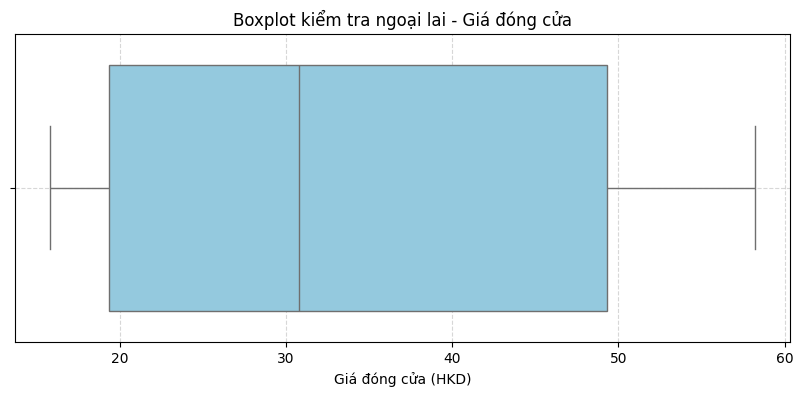

In [21]:
plt.figure(figsize=(10, 4))
sns.boxplot(x=df['Close'], color='skyblue')
plt.title('Boxplot kiểm tra ngoại lai - Giá đóng cửa')
plt.xlabel('Giá đóng cửa (HKD)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


#### Sau các bước làm sạch và xử lí dữ liệu, ta kết luận: ####

Dữ liệu thu thập được từ thư viện `yfinance` cho mã cổ phiếu Xiaomi Corp (`1810.HK`) đã có đầy đủ các cột cần thiết: `Date`, `Open`, `High`, `Low`, `Close`, `Volume`. Qua kiểm tra sơ bộ:

- Không xuất hiện các giá trị thiếu (`NaN`) trong các cột quan trọng.
- Không phát hiện outliers rõ rệt trong dữ liệu.
- Cột `Date` đã có định dạng thời gian chuẩn `ISO 8601` và được chuyển về kiểu `date time` trong Python để phục vụ phân tích thời gian.

**Do đó, không cần thực hiện thao tác loại bỏ hay xử lí thêm. Dữ liệu đã sẵn sàng để tính toán các chỉ số kỹ thuật và phân tích tiếp theo.**

In [ ]:
df.to_csv("xiaomi_stock_price_after cleaning and processing.csv", index= False)

### **1.4.** Tính toán chỉ số kĩ thuật cơ bản:
**1.4.1.** Trung bình động đơn giản **SMA** với các khoảng 20 ngày, 50 ngày:

In [6]:
df['SMA20'] = df['Close'].rolling(window=20).mean()
df['SMA50'] = df['Close'].rolling(window=50).mean()

**1.4.2.** Trung bình động hàm mũ **EMA** với khoảng 20 ngày:

In [7]:
df['EMA20'] = df['Close'].ewm(span=20, adjust=False).mean()

Tìm điểm giao nhau SMA (Golden/Death Cross)

In [ ]:
df['Signal'] = 0
df.loc[(df['SMA20'] > df['SMA50']) & (df['SMA20'].shift(1) <= df['SMA50'].shift(1)), 'Signal'] = 1
df.loc[(df['SMA20'] < df['SMA50']) & (df['SMA20'].shift(1) >= df['SMA50'].shift(1)), 'Signal'] = -1

golden_cross = df[df['Signal'] == 1]
death_cross = df[df['Signal'] == -1]

Biểu đồ thể hiện tương quan giữa giá đóng cửa, SMA và EMA:

In [ ]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=df['Date'], y=df['Close'], name='Close', line=dict(color='blue')))
fig.add_trace(go.Scatter(x=df['Date'], y=df['SMA20'], name='SMA20', line=dict(color='green', dash='dash')))
fig.add_trace(go.Scatter(x=df['Date'], y=df['SMA50'], name='SMA50', line=dict(color='orange', dash='dash')))

fig.add_trace(go.Scatter(x=df['Date'], y=df['EMA20'], name='EMA20', line=dict(color='magenta', dash='dot')))

fig.add_trace(go.Scatter(
    x=golden_cross['Date'], y=golden_cross['Close'],
    mode='markers', marker=dict(color='green', size=10, symbol='triangle-up'), name='Golden Cross'
))
fig.add_trace(go.Scatter(
    x=death_cross['Date'], y=death_cross['Close'],
    mode='markers', marker=dict(color='red', size=10, symbol='triangle-down'), name='Death Cross'
))

fig.update_layout(
    title={'text': f"SMA & EMA của {symbol} và điểm giao cắt", 'x': 0.5},
    xaxis_title='Ngày',
    yaxis_title='Giá (HKD)',
    hovermode='x unified',
    template='plotly_white'
)

fig.write_html("close price, SMA and EMA.html")
webbrowser.open("close price, SMA and EMA.html")

**1.4.3.** Chỉ số sức mạnh tương đối **RSI**:

In [8]:
def compute_rsi(data, window=14):
    delta = data.diff()
    gain = delta.clip(lower=0)
    loss = -1 * delta.clip(upper=0)
    avg_gain = gain.rolling(window=window).mean()
    avg_loss = loss.rolling(window=window).mean()
    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

df['RSI'] = compute_rsi(df['Close'])


Xác định overbought/oversold

In [25]:
overbought = df[df['RSI'] > 70]
oversold = df[df['RSI'] < 30]

Biểu đồ thể hiện tương quan giữa SMA, RSI:

In [29]:
fig = sp.make_subplots(
    rows=2, cols=1,
    shared_xaxes=True,
    vertical_spacing=0.08,
    subplot_titles=("Giá và SMA", "RSI (14 ngày)")
)

fig.add_trace(go.Scatter(x=df['Date'], y=df['Close'], name='Close', line=dict(color='blue')), row=1, col=1)
fig.add_trace(go.Scatter(x=df['Date'], y=df['SMA20'], name='SMA20', line=dict(color='green', dash='dash')), row=1, col=1)
fig.add_trace(go.Scatter(x=df['Date'], y=df['SMA50'], name='SMA50', line=dict(color='orange', dash='dash')), row=1, col=1)

fig.add_trace(go.Scatter(x=df['Date'], y=df['RSI'], name='RSI', line=dict(color='purple')), row=2, col=1)

fig.add_hline(y=70, line_dash="dash", line_color='red', row=2, col=1)
fig.add_hline(y=30, line_dash="dash", line_color='green', row=2, col=1)

fig.add_trace(go.Scatter(
    x=overbought['Date'], y=overbought['RSI'], mode='markers', name='Overbought',
    marker=dict(color='red', size=8, symbol='triangle-down')
), row=2, col=1)
fig.add_trace(go.Scatter(
    x=oversold['Date'], y=oversold['RSI'], mode='markers', name='Oversold',
    marker=dict(color='green', size=8, symbol='triangle-up')
), row=2, col=1)

fig.update_layout(
    title={'text': f"Phân tích cổ phiếu {symbol}: Giá + SMA và RSI (14 ngày)", 'x': 0.5},
    hovermode='x unified',
    template='plotly_white',
    height=800
)

fig.write_html("SMA_RSI.html")
webbrowser.open("SMA_RSI.html")

True

### **1.5.** Phân tích dữ liệu:

**1.5.1.** Tính lợi suất ngày, phân phối lợi suất:
- Lợi suất hằng ngày được tính bằng tỷ lệ phần trăm thay đổi giữa giá đóng cửa của ngày hiện tại và ngày trước đó. Lợi suất hằng ngày giúp đánh giá tốc độ tăng/giảm giá trong ngắn hạn.
Biến `Daily Return` được thêm vào để phân tích lợi suất và biến động.

In [9]:
df['Daily Return'] = df['Close'].pct_change()

- Phân phối lợi suất bằng Histogram để xem lợi suất nằm trong khoảng nào, phân phối như thế nào.
- Công thức được sử dụng:

$$
r_t = \frac{P_t - P_{t-1}}{P_{t-1}}
$$

Biểu đồ lợi suất hằng ngày:

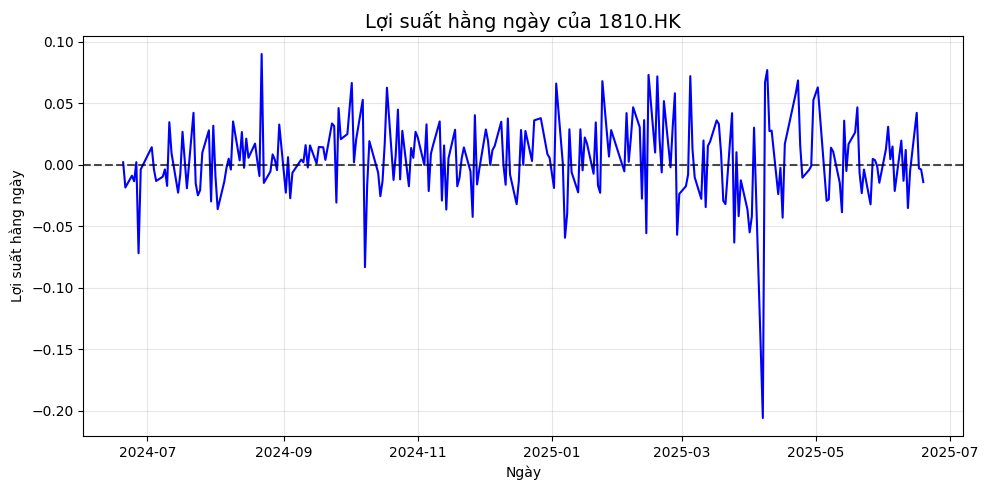

In [17]:
plt.figure(figsize=(10,5))
plt.plot(df['Date'], df['Daily Return'], color='blue')
plt.axhline(0, color='black', linestyle='--', alpha=0.7)
plt.title(f'Lợi suất hằng ngày của {symbol}', fontsize=14)
plt.xlabel('Ngày')
plt.ylabel('Lợi suất hằng ngày')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

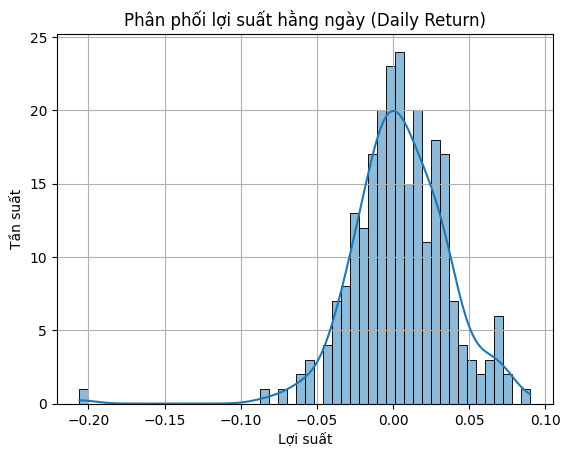

In [10]:
sns.histplot(df['Daily Return'].dropna(), bins=50, kde=True)
plt.title('Phân phối lợi suất hằng ngày (Daily Return)')
plt.xlabel('Lợi suất')
plt.ylabel('Tần suất')
plt.grid(True)
plt.show()


**1.5.2** Tính độ biến động (volatility) theo tháng hoặc quý:


- Độ biến động theo tháng/quý được tính bằng độ lệch chuẩn của lợi suất hằng ngày trong từng tháng/quý đó. Qua đó, có thể xác định được các giai đoạn giá cổ phiếu dao động mạnh.


Vì thời gian khảo sát là không quá ngắn cũng không quá dài (1 năm), ta sẽ ưu tiên tính độ biến động theo tháng để dễ dàng theo dõi dữ liệu.

In [19]:
df['Month'] = df['Date'].dt.to_period('M')
monthly_volatility = df.groupby('Month')['Daily Return'].std()
display(monthly_volatility)

C:\Users\tran huu duong\AppData\Local\Temp\ipykernel_12864\3088838682.py:1: UserWarning:

Converting to PeriodArray/Index representation will drop timezone information.



Month
2024-06    0.025812
2024-07    0.021472
2024-08    0.024859
2024-09    0.020323
2024-10    0.034029
2024-11    0.023621
2024-12    0.020026
2025-01    0.033143
2025-02    0.037978
2025-03    0.033267
2025-04    0.064071
2025-05    0.027099
2025-06    0.020861
Freq: M, Name: Daily Return, dtype: float64

Biểu đồ thể hiện độ biến động

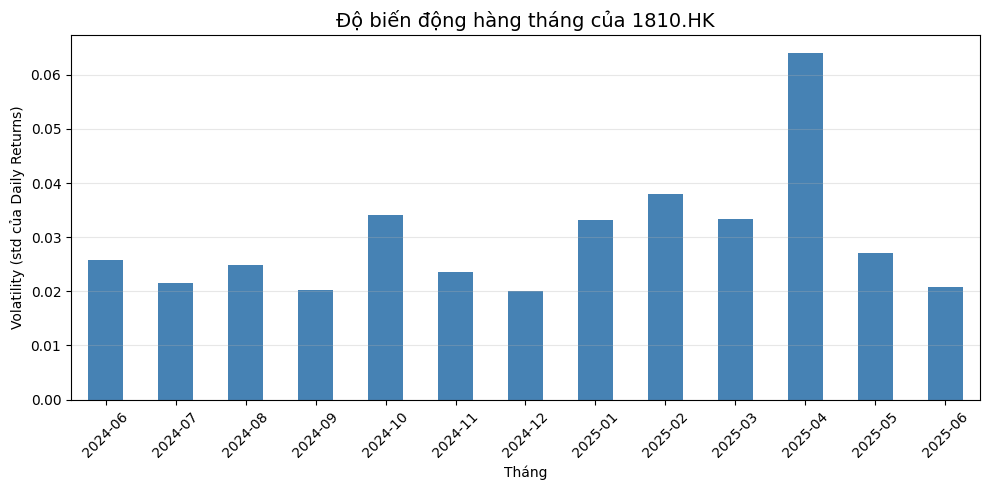

In [20]:
plt.figure(figsize=(10,5))
monthly_volatility.plot(kind='bar', color='steelblue')
plt.title(f'Độ biến động hàng tháng của {symbol}', fontsize=14)
plt.ylabel('Volatility (std của Daily Returns)')
plt.xlabel('Tháng')
plt.grid(axis='y', alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

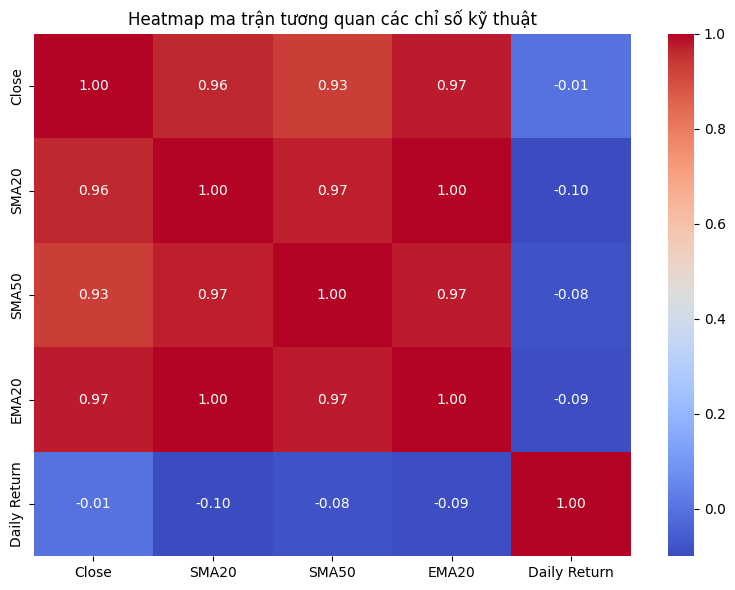

In [15]:
# ------------------- 3. Biểu đồ heatmap tương quan -------------------
# Chọn các biến liên quan để vẽ heatmap
corr_df = df[['Close', 'SMA20', 'SMA50', 'EMA20', 'Daily Return']].dropna()
correlation_matrix = corr_df.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap ma trận tương quan các chỉ số kỹ thuật')
plt.tight_layout()
plt.show()